# Analiziranje podatkov glede na ITM klasifikacijo

Naložimo ustrezne pakete

In [135]:
# naložimo pakete
import os
import pandas as pd

nov_directory = 'obdelani podatki'
csv_drzave = 'drzave.csv'
csv_kontinenti = 'kontinenti.csv'
csv_dodatno = 'dodatno.csv'

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

pd.set_option("display.max_rows", 15)
path1 = os.path.join(nov_directory, csv_drzave) 
path2 = os.path.join(nov_directory, csv_kontinenti) 
path3 = os.path.join(nov_directory, csv_dodatno)

#naložimo razpredelnico, s katero bomo delali
countries = pd.read_csv(path1)
continents = pd.read_csv(path2)
ITM = pd.read_csv(path3)

In [136]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1. Splošno

In [137]:
ITM.index += 1
ITM

,kategorija,ITM,ITM prime
1,Severe Thinness,< 16,< 0.64
2,Moderate Thinness,16 - 17,0.64 - 0.68
3,Mild Thinness,17 - 18.5,0.68 - 0.74
4,Normal,18.5 - 25,0.74 - 1
5,Overweight,25 - 30,1 - 1.2
6,Obese Class I,30 - 35,1.2- 1.4
7,Obese Class II,35 - 40,1.4 - 1.6
8,Obese Class III,> 40,> 1.6


Države

moški

In [138]:
def classify_and_print_countries(countries, categories):
    classified_countries = {category: {"countries": [], "count": 0} for category in categories["kategorija"]}
    category_counts = {}  
    
    for _, row in countries.iterrows(): # _ je za indeks, ki nas trenutno ne zanima; iterrows gre skozi vrstice
        country = row["ime države"]
        itm = float(row["ITM moških"])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm < upper_bound:
                classified_countries[bounds["kategorija"]]["countries"].append(country)
                classified_countries[bounds["kategorija"]]["count"] += 1
                break
    
    for category, data in classified_countries.items():
        count = data['count']
        countries_list = data['countries']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobene države.")
        else:
            country_list_str = ', '.join(countries_list)
            total_countries = len(countries_list)
            print(f"V kategoriji '{category}' so naslednje države: {country_list_str}. Število vseh držav je {total_countries}.")
        category_counts[category] = count
    
    return category_counts

def razclenitev(range_str):
    if '<' in range_str:
        lower = float('-inf') #ni spodnje meje
        upper = float(range_str[1:]) # da umaknemo "<"
    elif '-' in range_str:
        lower, upper = map(float, range_str.split('-')) #da dobimo zgornjo in spodnjo mejo
    else: 
            lower = float(range_str) 
            upper = float('inf')
    return lower, upper
    

category_counts_m = classify_and_print_countries(countries, ITM)


V kategoriji 'Severe Thinness' ni nobene države.
V kategoriji 'Moderate Thinness' ni nobene države.
V kategoriji 'Mild Thinness' ni nobene države.
V kategoriji 'Normal' so naslednje države: South Korea, China, Hong Kong, North Korea, Algeria, Singapore, Mauritius, Japan, Thailand, Cameroon, Sudan, Chad, Somalia, Eritrea, Zimbabwe, Kenya, Nigeria, Ghana, Niger, Vietnam, Afghanistan, Congo (Dem. Republic), Ethiopia, Maldives, Sri Lanka, Burundi, Pakistan, Myanmar, India, Indonesia, Cambodia, Madagascar, Philippines, Bangladesh, Nepal, Yemen, Laos, East Timor. Število vseh držav je 38.
V kategoriji 'Overweight' so naslednje države: Netherlands, Montenegro, Estonia, Denmark, Bosnia and Herzegovina, Iceland, Czechia, Slovenia, Slovakia, Croatia, Serbia, Sweden, Norway, Lithuania, Poland, Ukraine, Finland, Latvia, Germany, Dominica, Belgium, Bermuda, Greece, Puerto Rico, Switzerland, Australia, Ireland, Canada, Austria, France, Antigua and Barbuda, Lebanon, Belarus, Andorra, French Polynesia

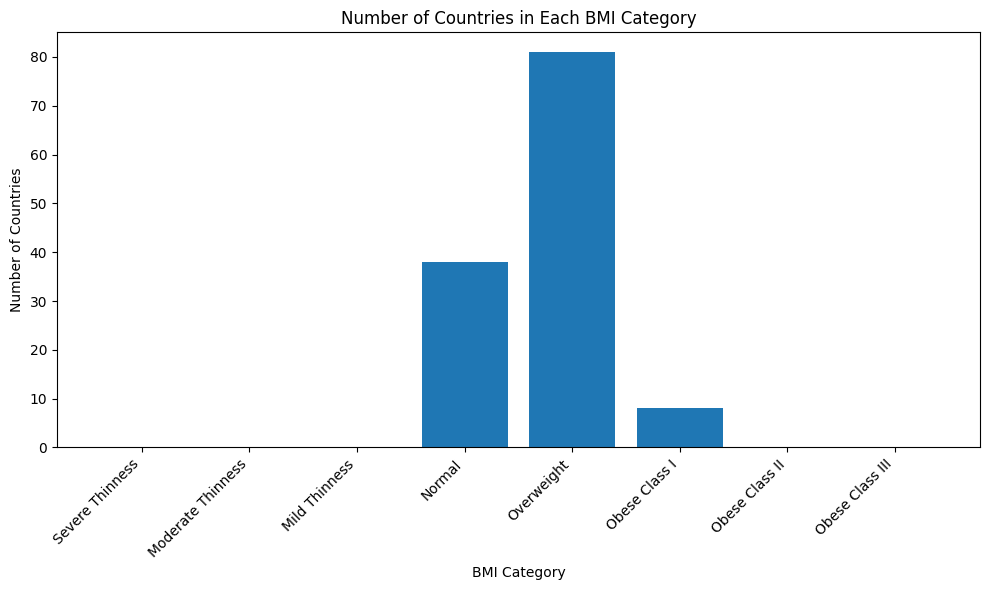

In [139]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_m.keys(), category_counts_m.values())
plt.xlabel("BMI Category")
plt.ylabel("Number of Countries")
plt.title("Number of Countries in Each BMI Category")
plt.xticks(rotation=45, ha="right")

#da se izriše graf
plt.tight_layout()
plt.show()


ženske

In [140]:
def classify_and_print_countries_female(countries, categories):
    classified_countries = {category: {"countries": [], "count": 0} for category in categories["kategorija"]}
    category_counts = {} 

    for _, row in countries.iterrows():  # _ je za indeks, ki nas trenutno ne zanima; iterrows gre skozi vrstice
        country = row["ime države"]
        itm = float(row["ITM žensk"])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm < upper_bound:
                classified_countries[bounds["kategorija"]]["countries"].append(country)
                classified_countries[bounds["kategorija"]]["count"] += 1
                break
    

    for category, data in classified_countries.items():
        count = data['count']
        countries_list = data['countries']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobene države.")
        else:
            country_list_str = ', '.join(countries_list)
            total_countries = len(countries_list)
            print(f"V kategoriji '{category}' so naslednje države: {country_list_str}. Število vseh držav je {total_countries}.")
        category_counts[category] = count
    
    return category_counts


def razclenitev(range_str):
    if '<' in range_str:
        lower = float('-inf') #ni spodnje meje
        upper = float(range_str[1:]) # da umaknemo "<"
    elif '-' in range_str:
        lower, upper = map(float, range_str.split('-')) #da dobimo zgornjo in spodnjo mejo
    else: 
            lower = float(range_str) 
            upper = float('inf')
    return lower, upper
    
category_counts_f = classify_and_print_countries_female(countries, ITM)



V kategoriji 'Severe Thinness' ni nobene države.
V kategoriji 'Moderate Thinness' ni nobene države.
V kategoriji 'Mild Thinness' ni nobene države.
V kategoriji 'Normal' so naslednje države: Denmark, Switzerland, Austria, France, South Korea, China, Hong Kong, Italy, North Korea, Taiwan, Singapore, Haiti, Japan, Chad, Somalia, Eritrea, Kenya, Nigeria, Niger, Vietnam, Afghanistan, Congo (Dem. Republic), Ethiopia, Sri Lanka, Burundi, Pakistan, Myanmar, India, Indonesia, Cambodia, Madagascar, Philippines, Bangladesh, Nepal, Yemen, Laos, East Timor. Število vseh držav je 37.
V kategoriji 'Overweight' so naslednje države: Netherlands, Montenegro, Estonia, Bosnia and Herzegovina, Iceland, Czechia, Slovenia, Slovakia, Croatia, Serbia, Sweden, Norway, Lithuania, Poland, Ukraine, Finland, Latvia, Germany, Dominica, Belgium, Bermuda, Greece, Puerto Rico, Australia, Ireland, Canada, Antigua and Barbuda, Lebanon, Belarus, Andorra, French Polynesia, Luxembourg, United Kingdom, Grenada, New Zealand, 

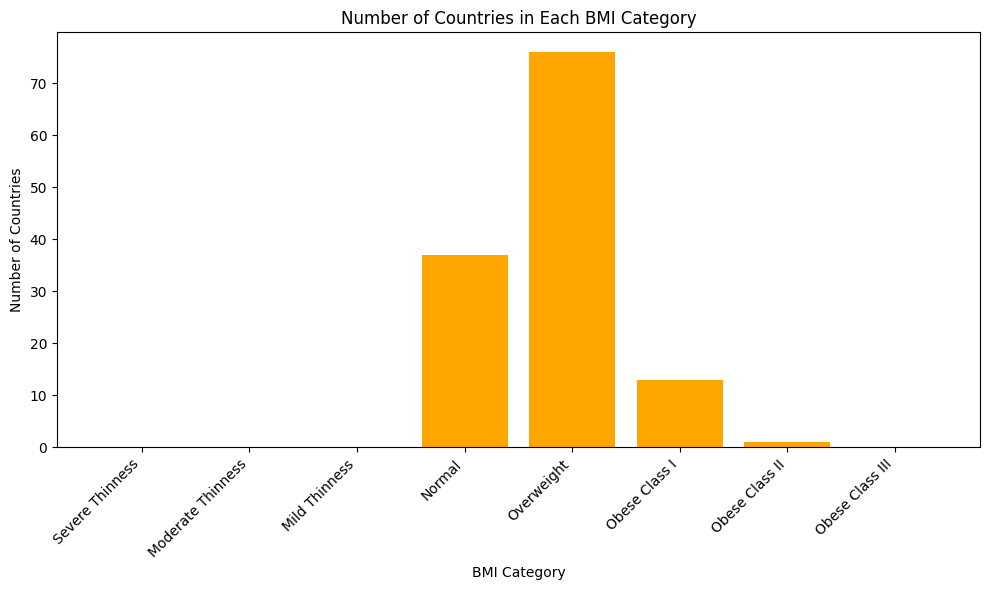

In [141]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_f.keys(), category_counts_f.values(), color='orange')
plt.xlabel("BMI Category")
plt.ylabel("Number of Countries")
plt.title("Number of Countries in Each BMI Category")
plt.xticks(rotation=45, ha="right")

# da se nariše graf
plt.tight_layout()
plt.show()


vsaka kategorija zase

In [142]:
def create_sorted_tables_by_category(countries, itm, categories):
    classified_countries = {category: {"countries": []} for category in categories}
    
    for _, country_row in countries.iterrows():
        country = country_row["ime države"]
        itm_value = float(country_row["ITM moških"])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm_value < upper_bound:
                classified_countries[bounds["kategorija"]]["countries"].append((country, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_countries.items():
        countries_list = data['countries']
        
        if countries_list:
            sorted_countries = sorted(countries_list, key=lambda x: x[1], reverse=True)
            sorted_df = pd.DataFrame(sorted_countries, columns=["ime države", "ITM moških"], index=range(1, len(sorted_countries) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables


sorted_tables_by_category = create_sorted_tables_by_category(countries, ITM, ITM["kategorija"])
for category, sorted_df in sorted_tables_by_category.items():
    print(f"Category: {category}")
    print(sorted_df)
    print("\n")


Category: Normal
               ime države  ITM moških
1                 Algeria        24.7
2               Mauritius        24.6
3                Maldives        24.6
4               Hong Kong        24.5
5             South Korea        24.4
..                    ...         ...
34  Congo (Dem. Republic)        21.4
35             Bangladesh        21.3
36             East Timor        21.2
37                Eritrea        20.3
38               Ethiopia        20.1

[38 rows x 2 columns]


Category: Overweight
          ime države  ITM moških
1   French Polynesia        29.6
2              Palau        29.6
3        Saint Lucia        29.5
4           Kiribati        29.1
5      United States        29.0
..               ...         ...
77          Malaysia        25.2
78           Grenada        25.1
79      South Africa        25.1
80          Dominica        25.0
81            Taiwan        25.0

[81 rows x 2 columns]


Category: Obese Class I
       ime države  ITM moških
1  Ame

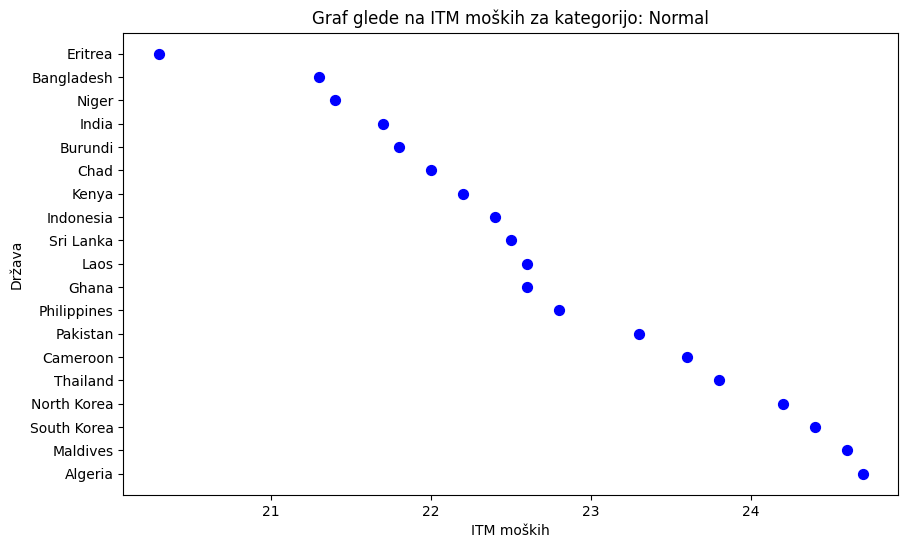

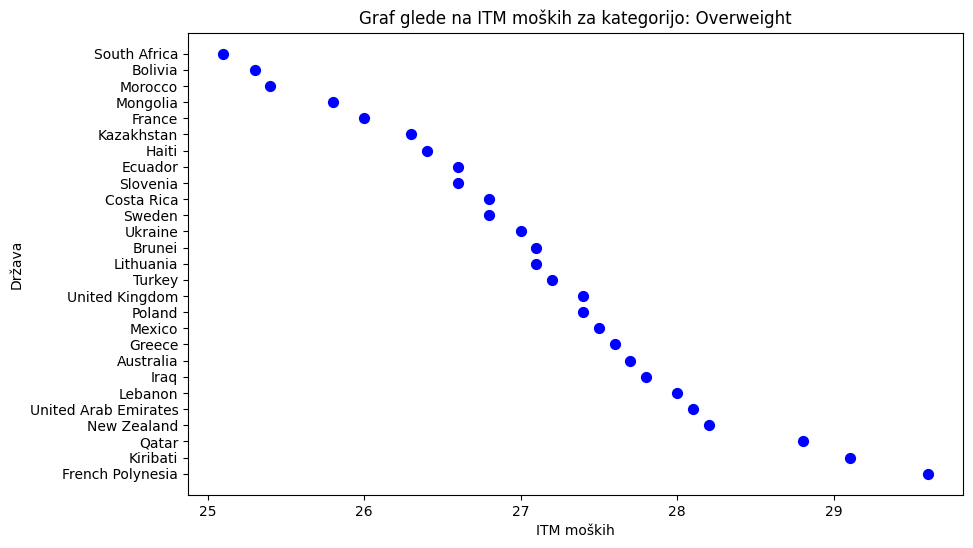

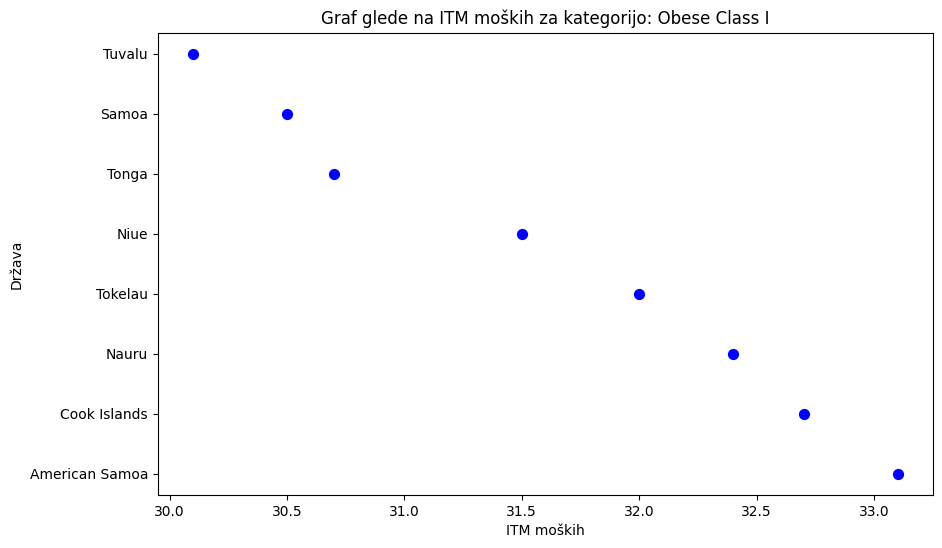

In [143]:
def generate_male_scatter_plots(sorted_tables):
    for category, sorted_df in sorted_tables.items():
        countries = sorted_df["ime države"]
        itm_values = sorted_df["ITM moških"]

        plt.figure(figsize=(10, 6))
        
        # da ne bomo imeli preveč natlačenih podatkov
        if len(countries) > 50:
            step = 3 #vzamemo vsak tretji podatek, če je držav več kot 50
        elif len(countries) > 30:
            step = 2 #vzamemo vsak drugi podatek, če je držav več kot 30
        else:
            step = 1 #če jih je manj kot 30, vzamemo vse
        
        plt.scatter(itm_values[::step], countries[::step], color='blue', marker='o', s=50)
        plt.xlabel('ITM moških')
        plt.ylabel('Država')
        plt.title(f'Graf glede na ITM moških za kategorijo: {category}')
        plt.show()

generate_male_scatter_plots(sorted_tables_by_category)


In [144]:
def create_sorted_tables_by_category_female(countries, itm, categories):
    classified_countries = {category: {"countries": []} for category in categories}
    
    for _, row in countries.iterrows():
        country = row["ime države"]
        itm_value = float(row["ITM žensk"])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm_value < upper_bound:
                classified_countries[bounds["kategorija"]]["countries"].append((country, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_countries.items():
        countries_list = data['countries']
        
        if countries_list:
            sorted_countries = sorted(countries_list, key=lambda x: x[1], reverse=True)
            sorted_df = pd.DataFrame(sorted_countries, columns=["ime države", "ITM žensk"], index=range(1, len(sorted_countries) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables


sorted_tables_by_category_female = create_sorted_tables_by_category_female(countries, ITM, ITM["kategorija"])
for category, sorted_df in sorted_tables_by_category_female.items():
    print(f"Category: {category}")
    print(sorted_df)
    print("\n")


Category: Normal
    ime države  ITM žensk
1        Italy       24.9
2      Austria       24.7
3     Pakistan       24.7
4      Denmark       24.6
5       France       24.4
..         ...        ...
33     Burundi       21.5
34  East Timor       21.2
35     Eritrea       21.1
36  Madagascar       21.1
37    Ethiopia       21.0

[37 rows x 2 columns]


Category: Overweight
                ime države  ITM žensk
1                     Iraq       29.7
2                    Palau       29.7
3         French Polynesia       29.5
4     United Arab Emirates       29.5
5             South Africa       29.5
..                     ...        ...
72  Bosnia and Herzegovina       25.3
73                   Ghana       25.2
74                   Spain       25.1
75                Cameroon       25.1
76                Thailand       25.0

[76 rows x 2 columns]


Category: Obese Class I
      ime države  ITM žensk
1          Samoa       34.1
2          Tonga       33.9
3        Tokelau       33.7
4       

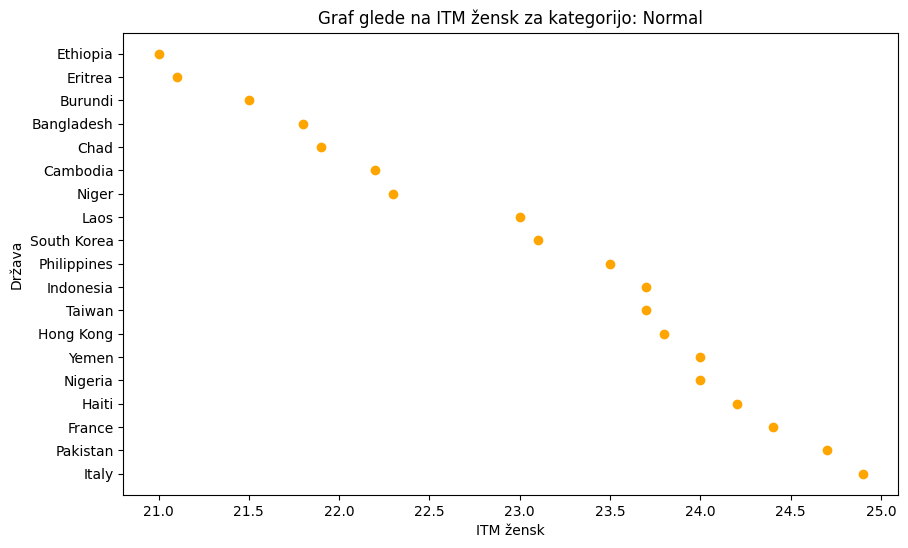

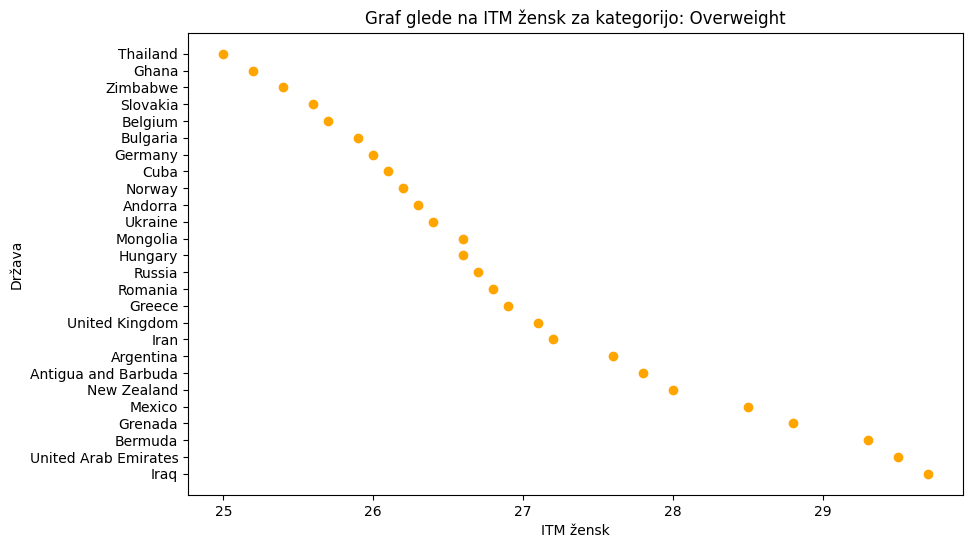

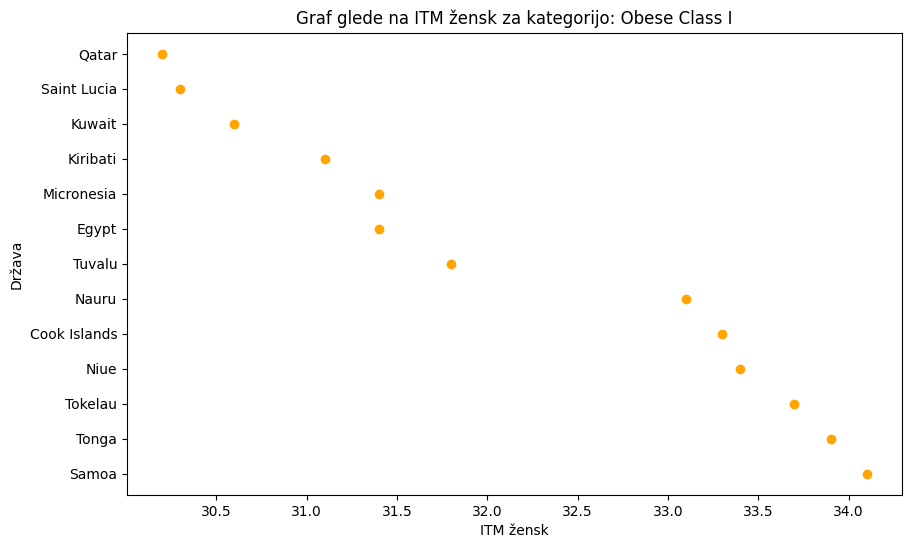

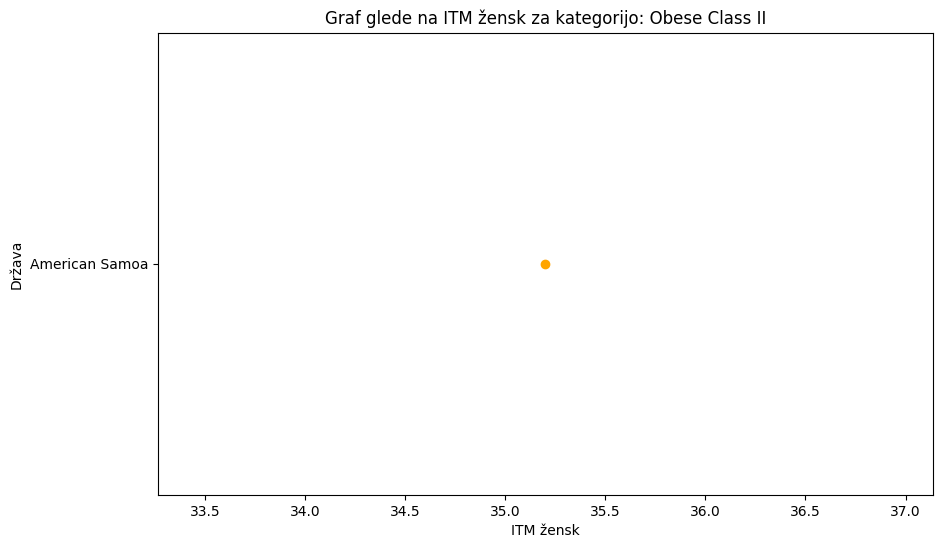

In [145]:
def plot_category(category_data, category_name):
    countries = category_data["ime države"]
    itm_values = category_data["ITM žensk"]

    plt.figure(figsize=(10, 6))
    
    if len(countries) > 50:
        step = 3
    elif len(countries) > 30:
        step = 2
    else:
        step = 1

    plt.scatter(itm_values[::step], countries[::step], color='orange')
    plt.xlabel('ITM žensk')
    plt.ylabel('Država')
    plt.title(f'Graf glede na ITM žensk za kategorijo: {category_name}')
    plt.show()

for category, category_data in sorted_tables_by_category_female.items():
    plot_category(category_data, category)


kontinenti

In [146]:
# po formuli izračunamo ITM
continents["ITM moških"] = continents["teža moških"] / (continents["višina moških"] ** 2)
continents["ITM žensk"] = continents["teža žensk"] / (continents["višina žensk"] ** 2)

print(continents)


     del kontinenta  višina moških  teža moških  višina žensk  teža žensk  \
0   Northern Africa           1.73         77.9          1.61        73.7   
1    Eastern Africa           1.67         60.1          1.57        56.2   
2    Western Africa           1.70         64.9          1.59        60.1   
3   Southern Africa           1.69         71.2          1.59        73.2   
4    Central Africa           1.69         62.6          1.58        58.0   
..              ...            ...          ...           ...         ...   
17  Northern Europe           1.79         87.1          1.65        72.3   
18   Eastern Europe           1.78         83.8          1.65        72.2   
19        Polynesia           1.76         93.8          1.65        87.3   
20        Melanesia           1.64         68.1          1.57        64.6   
21       Micronesia           1.69         82.7          1.59        78.9   

    ITM moških  ITM žensk  
0    26.028267  28.432545  
1    21.549715  22.

In [147]:
# dodatek, da so stolpci tabele v istem vrstnem redu kot pri ostalih tabelah
desired_columns = ["del kontinenta", "višina moških", "teža moških", "ITM moških", "višina žensk", "teža žensk", "ITM žensk"]
urejena_tabela_continents = continents[desired_columns].round(2)

print(urejena_tabela_continents)

     del kontinenta  višina moških  teža moških  ITM moških  višina žensk  \
0   Northern Africa           1.73         77.9       26.03          1.61   
1    Eastern Africa           1.67         60.1       21.55          1.57   
2    Western Africa           1.70         64.9       22.46          1.59   
3   Southern Africa           1.69         71.2       24.93          1.59   
4    Central Africa           1.69         62.6       21.92          1.58   
..              ...            ...          ...         ...           ...   
17  Northern Europe           1.79         87.1       27.18          1.65   
18   Eastern Europe           1.78         83.8       26.45          1.65   
19        Polynesia           1.76         93.8       30.28          1.65   
20        Melanesia           1.64         68.1       25.32          1.57   
21       Micronesia           1.69         82.7       28.96          1.59   

    teža žensk  ITM žensk  
0         73.7      28.43  
1         56.2     

moški

In [148]:
def classify_and_print_continents(urejena_tabela_continents, categories):
    classified_continents = {category: {"continents": [], "count": 0} for category in categories["kategorija"]}
    category_counts = {}  
    
    for _, row in urejena_tabela_continents.iterrows():
        continent = row["del kontinenta"]
        itm = float(row["ITM moških"])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm < upper_bound:
                classified_continents[bounds["kategorija"]]["continents"].append(continent)
                classified_continents[bounds["kategorija"]]["count"] += 1
                break
    
    for category, data in classified_continents.items():
        count = data['count']
        continents_list = data['continents']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobenega dela kontinenta.")
        else:
            continent_list_str = ', '.join(continents_list)
            total_continents = len(continents_list)
            print(f"V kategoriji '{category}' so naslednji deli kontinentov: {continent_list_str}. Število vseh delov kontinentov je {total_continents}.")
        category_counts[category] = count
    
    return category_counts

category_counts_continents = classify_and_print_continents(urejena_tabela_continents, ITM)


V kategoriji 'Severe Thinness' ni nobenega dela kontinenta.
V kategoriji 'Moderate Thinness' ni nobenega dela kontinenta.
V kategoriji 'Mild Thinness' ni nobenega dela kontinenta.
V kategoriji 'Normal' so naslednji deli kontinentov: Eastern Africa, Western Africa, Southern Africa, Central Africa, East Asia, South Asia, Southeast Asia. Število vseh delov kontinentov je 7.
V kategoriji 'Overweight' so naslednji deli kontinentov: Northern Africa, Caribbean, North America, South America, Central America, Western Asia, Central Asia, Australia/New Zealand, Western Europe, Southern Europe, Northern Europe, Eastern Europe, Melanesia, Micronesia. Število vseh delov kontinentov je 14.
V kategoriji 'Obese Class I' so naslednji deli kontinentov: Polynesia. Število vseh delov kontinentov je 1.
V kategoriji 'Obese Class II' ni nobenega dela kontinenta.
V kategoriji 'Obese Class III' ni nobenega dela kontinenta.


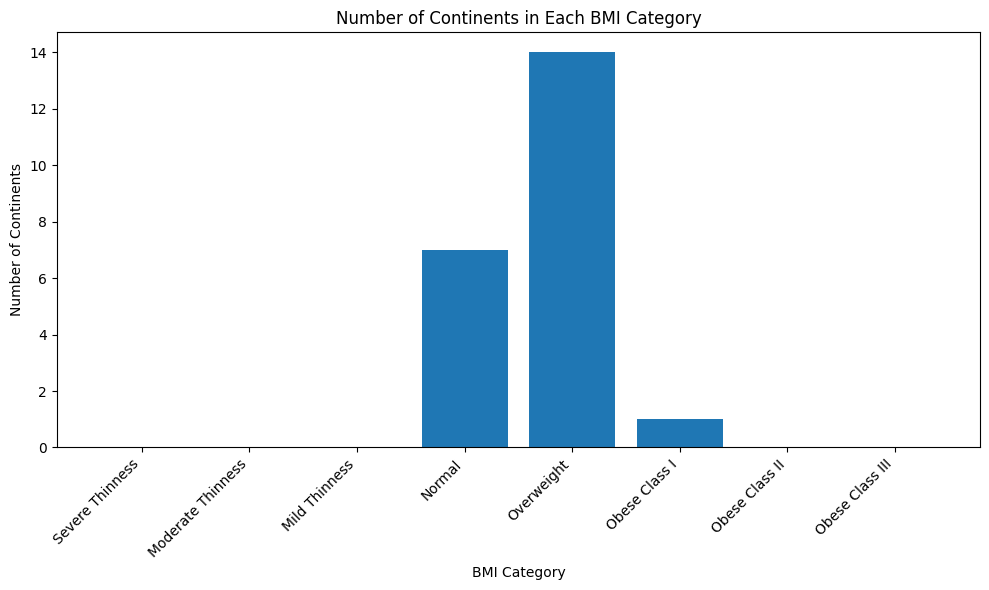

In [149]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_continents.keys(), category_counts_continents.values())
plt.xlabel("BMI Category")
plt.ylabel("Number of Continents")
plt.title("Number of Continents in Each BMI Category")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()



ženske

In [150]:
def classify_and_print_continents_female(urejena_tabela_continents, categories):
    classified_continents = {category: {"continents": [], "count": 0} for category in categories["kategorija"]}
    category_counts = {} 

    for _, row in urejena_tabela_continents.iterrows():
        continent = row["del kontinenta"]
        itm = float(row["ITM žensk"])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm < upper_bound:
                classified_continents[bounds["kategorija"]]["continents"].append(continent)
                classified_continents[bounds["kategorija"]]["count"] += 1
                break
    
    for category, data in classified_continents.items():
        count = data['count']
        continents_list = data['continents']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobenega kontinenta.")
        else:
            continent_list_str = ', '.join(continents_list)
            total_continents = len(continents_list)
            print(f"V kategoriji '{category}' so naslednji kontinenti: {continent_list_str}. Število vseh kontinentov je {total_continents}.")
        category_counts[category] = count
    
    return category_counts

category_counts_f = classify_and_print_continents_female(urejena_tabela_continents, ITM)


V kategoriji 'Severe Thinness' ni nobenega kontinenta.
V kategoriji 'Moderate Thinness' ni nobenega kontinenta.
V kategoriji 'Mild Thinness' ni nobenega kontinenta.
V kategoriji 'Normal' so naslednji kontinenti: Eastern Africa, Western Africa, Central Africa, East Asia, South Asia, Southeast Asia. Število vseh kontinentov je 6.
V kategoriji 'Overweight' so naslednji kontinenti: Northern Africa, Southern Africa, Caribbean, North America, South America, Central America, Western Asia, Central Asia, Australia/New Zealand, Western Europe, Southern Europe, Northern Europe, Eastern Europe, Melanesia. Število vseh kontinentov je 14.
V kategoriji 'Obese Class I' so naslednji kontinenti: Polynesia, Micronesia. Število vseh kontinentov je 2.
V kategoriji 'Obese Class II' ni nobenega kontinenta.
V kategoriji 'Obese Class III' ni nobenega kontinenta.


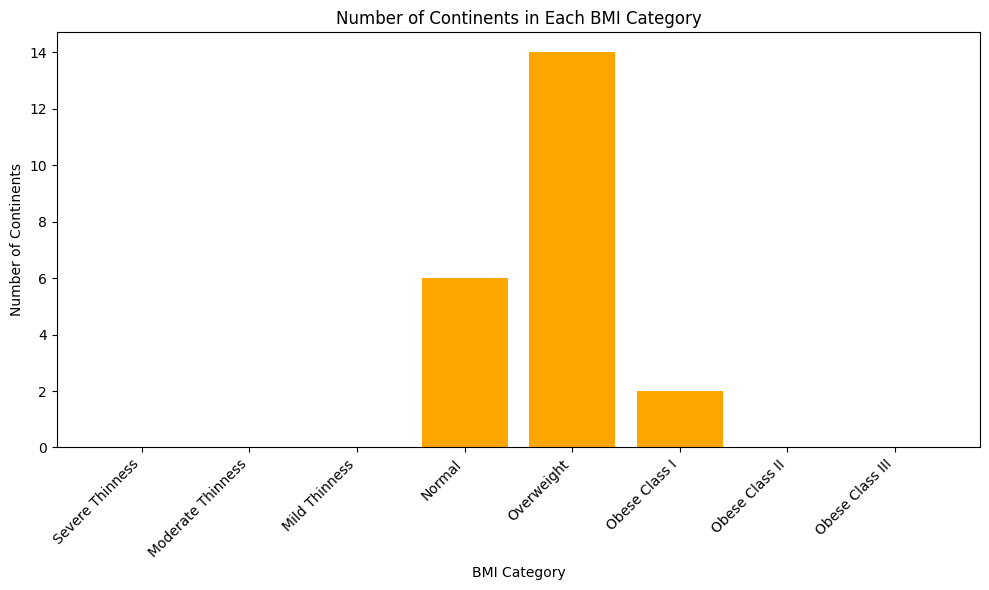

In [151]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_f.keys(), category_counts_f.values(), color='orange')
plt.xlabel("BMI Category")
plt.ylabel("Number of Continents")
plt.title("Number of Continents in Each BMI Category")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()

vsaka kategorija zase

In [152]:
def create_sorted_tables_by_category_male(continents, itm, categories):
    classified_continents = {category: {"continents": []} for category in categories}
    
    for _, row in continents.iterrows():
        continent = row["del kontinenta"]
        itm_value = float(row["ITM moških"])  
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm_value < upper_bound:
                classified_continents[bounds["kategorija"]]["continents"].append((continent, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_continents.items():
        continents_list = data['continents']
        
        if continents_list:
            sorted_continents = sorted(continents_list, key=lambda x: x[1], reverse=True)  
            sorted_df = pd.DataFrame(sorted_continents, columns=["del kontinenta", "ITM moških"], index=range(1, len(sorted_continents) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables

sorted_tables_by_category_male = create_sorted_tables_by_category_male(urejena_tabela_continents, ITM, ITM["kategorija"])
for category, sorted_df in sorted_tables_by_category_male.items():
    print(f"Category: {category}")
    print(sorted_df)
    print("\n")


Category: Normal
    del kontinenta  ITM moških
1  Southern Africa       24.93
2        East Asia       24.21
3   Southeast Asia       22.52
4   Western Africa       22.46
5       South Asia       22.10
6   Central Africa       21.92
7   Eastern Africa       21.55


Category: Overweight
           del kontinenta  ITM moških
1              Micronesia       28.96
2           North America       28.79
3   Australia/New Zealand       27.90
4         Central America       27.24
5            Western Asia       27.24
6         Northern Europe       27.18
7         Southern Europe       26.86
8          Western Europe       26.57
9           South America       26.53
10         Eastern Europe       26.45
11           Central Asia       26.33
12        Northern Africa       26.03
13              Caribbean       26.03
14              Melanesia       25.32


Category: Obese Class I
  del kontinenta  ITM moških
1      Polynesia       30.28




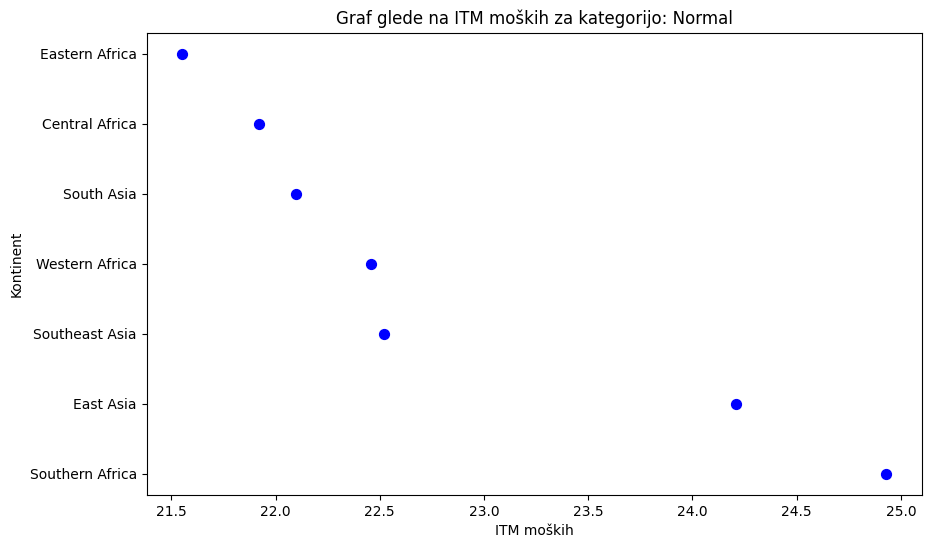

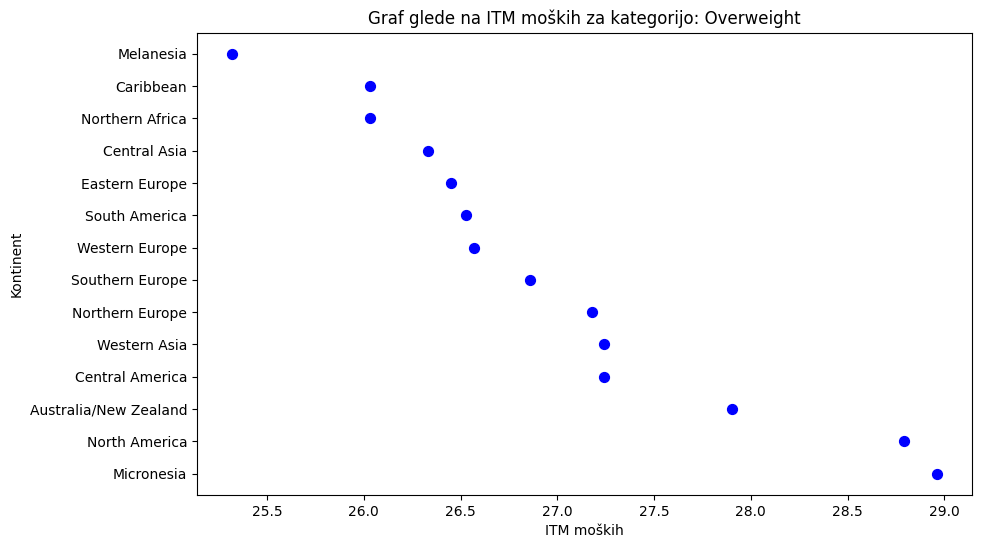

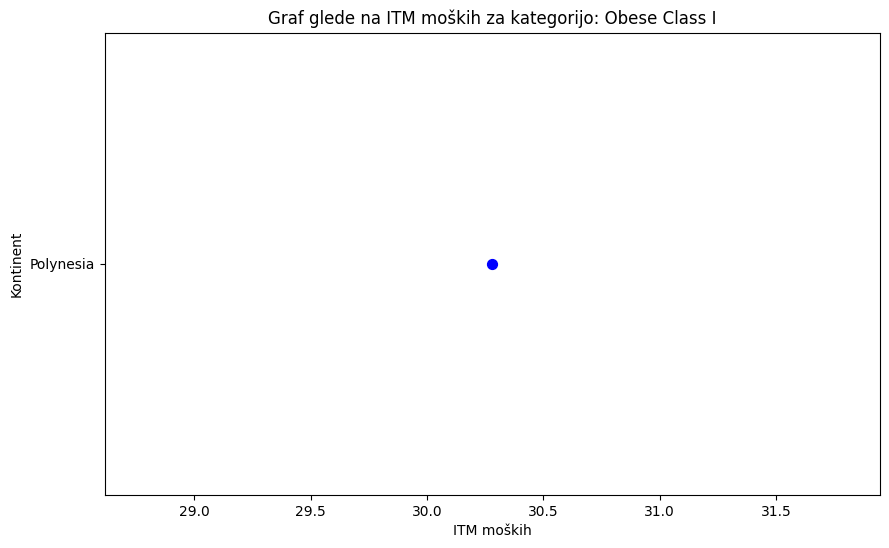

In [153]:
def generate_male_scatter_plots(sorted_tables):
    for category, sorted_df in sorted_tables.items():
        continents = sorted_df["del kontinenta"]
        itm_values = sorted_df["ITM moških"]  

        plt.figure(figsize=(10, 6))
        
        plt.scatter(itm_values, continents, color='blue', marker='o', s=50)
        plt.xlabel('ITM moških')
        plt.ylabel('Kontinent')
        plt.title(f'Graf glede na ITM moških za kategorijo: {category}')
        plt.show()


generate_male_scatter_plots(sorted_tables_by_category_male)


In [154]:
def create_sorted_tables_by_category_continent(continents, itm, categories):
    classified_continents = {category: {"continents": []} for category in categories}
    
    for _, row in continents.iterrows():
        continent = row["del kontinenta"]
        itm_value = float(row["ITM žensk"])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = razclenitev(bounds["ITM"])
            
            if lower_bound <= itm_value < upper_bound:
                classified_continents[bounds["kategorija"]]["continents"].append((continent, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_continents.items():
        continents_list = data['continents']
        
        if continents_list:
            sorted_continents = sorted(continents_list, key=lambda x: x[1], reverse=True)  
            sorted_df = pd.DataFrame(sorted_continents, columns=["del kontinenta", "ITM žensk"], index=range(1, len(sorted_continents) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables

sorted_tables_by_category_continent = create_sorted_tables_by_category_continent(urejena_tabela_continents, ITM, ITM["kategorija"])
for category, sorted_df in sorted_tables_by_category_continent.items():
    print(f"Category: {category}")
    print(sorted_df)
    print("\n")


Category: Normal
   del kontinenta  ITM žensk
1  Western Africa      23.77
2  Southeast Asia      23.60
3       East Asia      23.47
4  Central Africa      23.23
5  Eastern Africa      22.80
6      South Asia      22.48


Category: Overweight
           del kontinenta  ITM žensk
1         Southern Africa      28.95
2           North America      28.83
3            Western Asia      28.56
4         Northern Africa      28.43
5         Central America      28.16
6           South America      27.03
7            Central Asia      27.03
8   Australia/New Zealand      26.85
9               Caribbean      26.58
10        Northern Europe      26.56
11         Eastern Europe      26.52
12              Melanesia      26.21
13        Southern Europe      25.18
14         Western Europe      25.11


Category: Obese Class I
  del kontinenta  ITM žensk
1      Polynesia      32.07
2     Micronesia      31.21




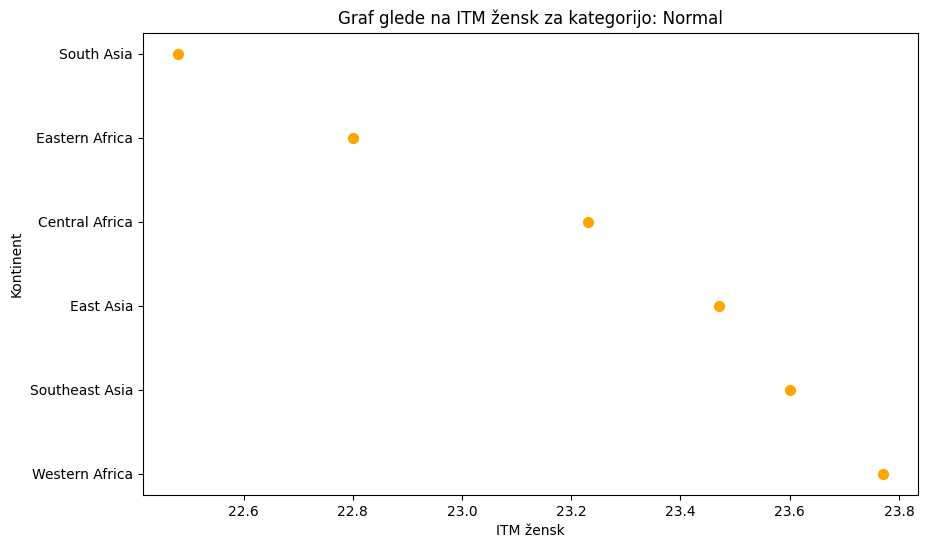

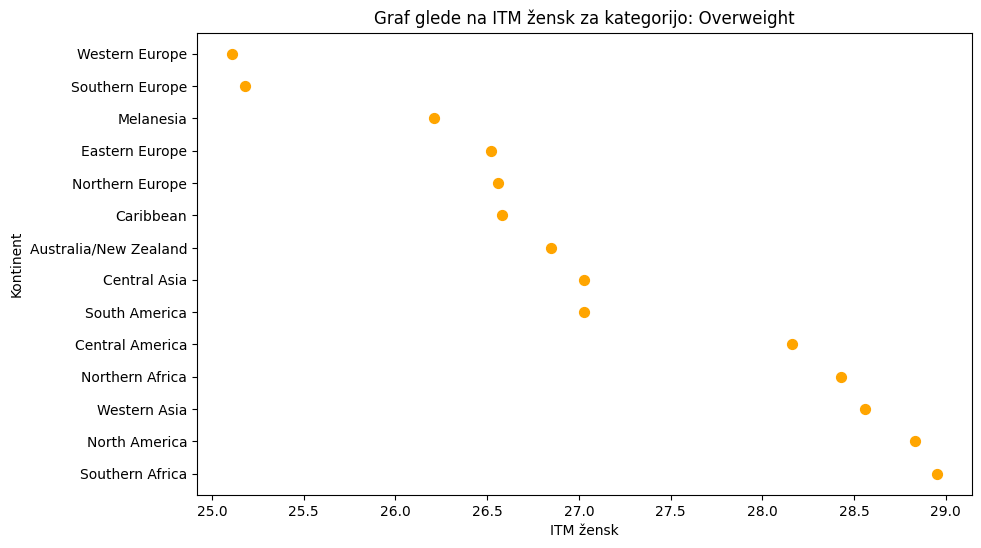

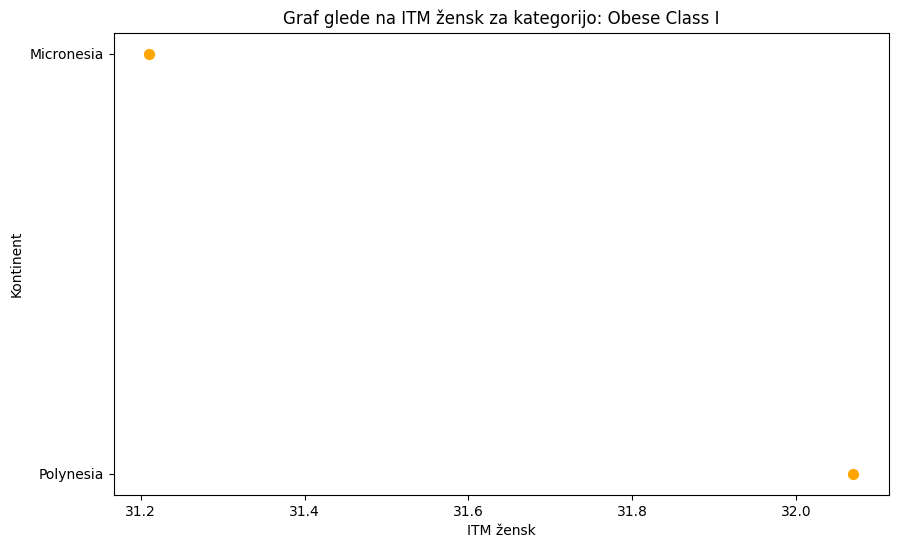

In [155]:
def generate_female_scatter_plots(sorted_tables):
    for category, sorted_df in sorted_tables.items():
        continents = sorted_df["del kontinenta"]
        itm_values = sorted_df["ITM žensk"]

        plt.figure(figsize=(10, 6))
        
        plt.scatter(itm_values, continents, color='orange', marker='o', s=50)
        plt.xlabel('ITM žensk')
        plt.ylabel('Kontinent')
        plt.title(f'Graf glede na ITM žensk za kategorijo: {category}')
        plt.show()


generate_female_scatter_plots(sorted_tables_by_category_continent)


vse 3 primerjave

drzave

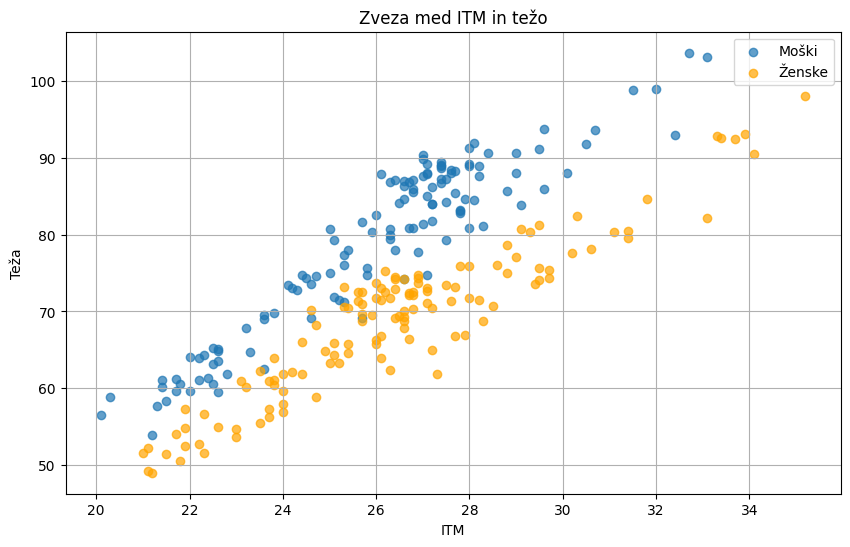

In [156]:
def compare_ITM_weight_relationship(countries):
    plt.figure(figsize=(10, 6))

    plt.scatter(countries["ITM moških"], countries["teža moških"], alpha=0.7, label="Moški")

    plt.scatter(countries["ITM žensk"], countries["teža žensk"], alpha=0.7, color='orange', label="Ženske")

    plt.title("Zveza med ITM in težo")
    plt.xlabel("ITM")
    plt.ylabel("Teža")
    plt.grid(True)
    plt.legend()
    plt.show()

compare_ITM_weight_relationship(countries)

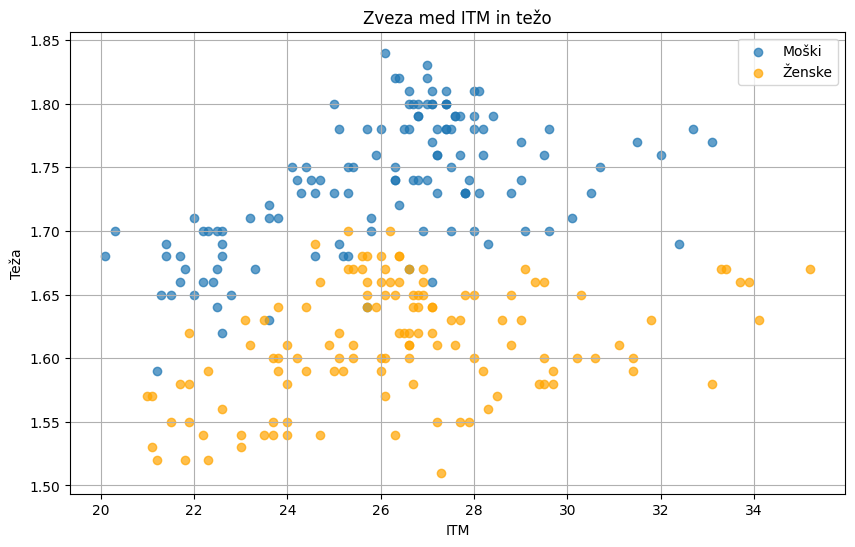

In [157]:
def compare_ITM_height_relationship(countries):
    plt.figure(figsize=(10, 6))

    plt.scatter(countries["ITM moških"], countries["višina moških"], alpha=0.7, label="Moški")

    plt.scatter(countries["ITM žensk"], countries["višina žensk"], alpha=0.7, color='orange', label="Ženske")

    plt.title("Zveza med ITM in težo")
    plt.xlabel("ITM")
    plt.ylabel("Teža")
    plt.grid(True)
    plt.legend()
    plt.show()

compare_ITM_height_relationship(countries)


kontinenti

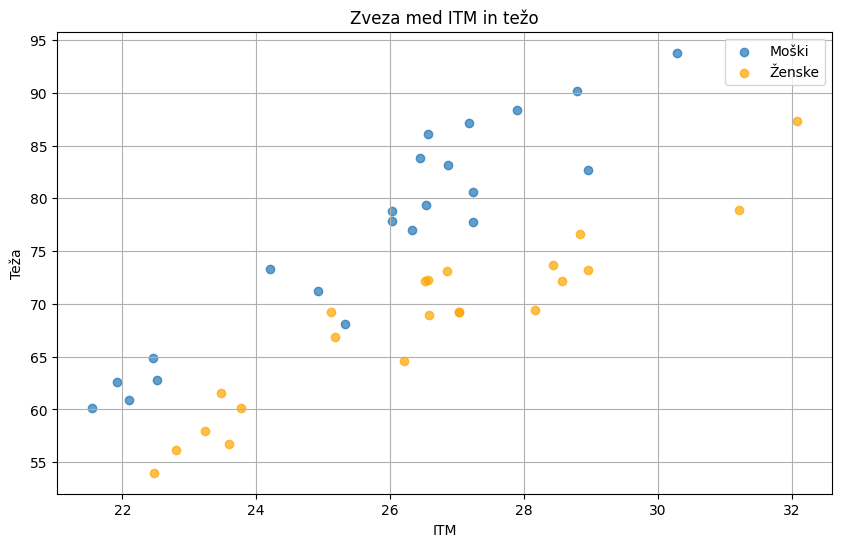

In [158]:
def compare_ITM_weight_relationship_c(urejena_tabela_continents):
    plt.figure(figsize=(10, 6))

    plt.scatter(urejena_tabela_continents["ITM moških"], urejena_tabela_continents["teža moških"], alpha=0.7, label="Moški")

    plt.scatter(urejena_tabela_continents["ITM žensk"], urejena_tabela_continents["teža žensk"], alpha=0.7, color='orange', label="Ženske")

    plt.title("Zveza med ITM in težo")
    plt.xlabel("ITM")
    plt.ylabel("Teža")
    plt.grid(True)
    plt.legend()
    plt.show()

compare_ITM_weight_relationship_c(urejena_tabela_continents)


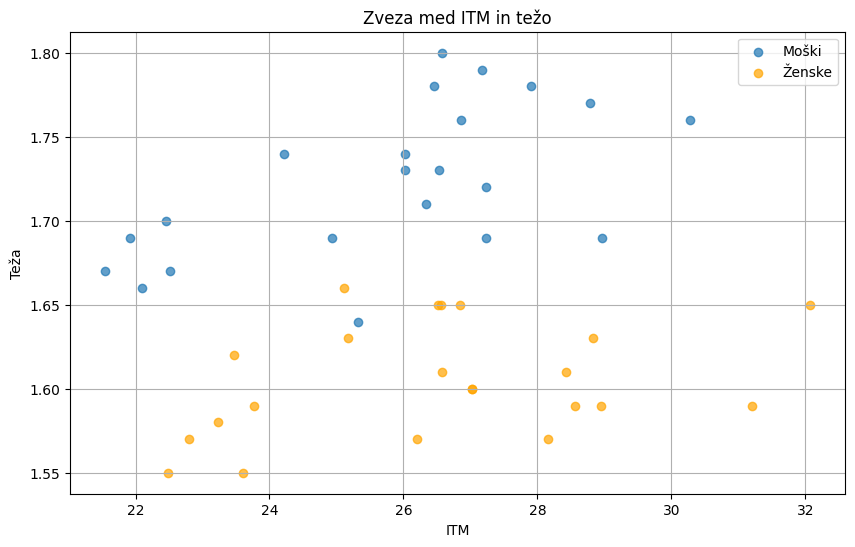

In [159]:
def compare_ITM_height_relationship_c(urejena_tabela_continents):
    plt.figure(figsize=(10, 6))

    plt.scatter(urejena_tabela_continents["ITM moških"], urejena_tabela_continents["višina moških"], alpha=0.7, label="Moški")

    plt.scatter(urejena_tabela_continents["ITM žensk"], urejena_tabela_continents["višina žensk"], alpha=0.7, color='orange', label="Ženske")

    plt.title("Zveza med ITM in težo")
    plt.xlabel("ITM")
    plt.ylabel("Teža")
    plt.grid(True)
    plt.legend()
    plt.show()

compare_ITM_height_relationship_c(urejena_tabela_continents)


države

<Figure size 1000x600 with 0 Axes>

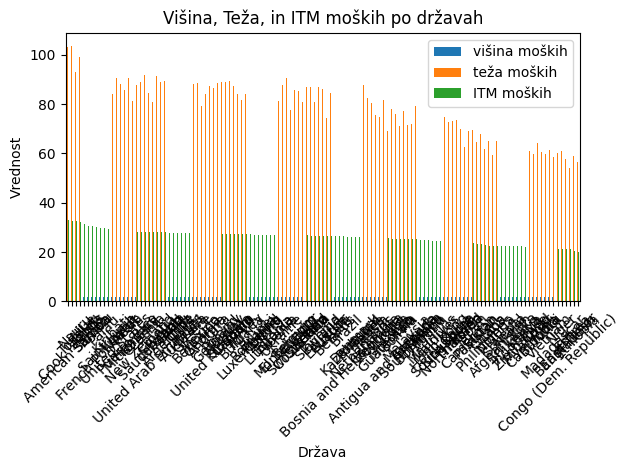

In [160]:
countries_sorted = countries.sort_values(by='ITM moških', ascending=False)

columns = ['višina moških', 'teža moških', 'ITM moških']

plt.figure(figsize=(10, 6))
countries_sorted[columns].set_index(countries_sorted['ime države']).plot(kind='bar', rot=45)
plt.xlabel('Država')
plt.ylabel('Vrednost')
plt.title('Višina, Teža, in ITM moških po državah')
plt.tight_layout()
plt.show()

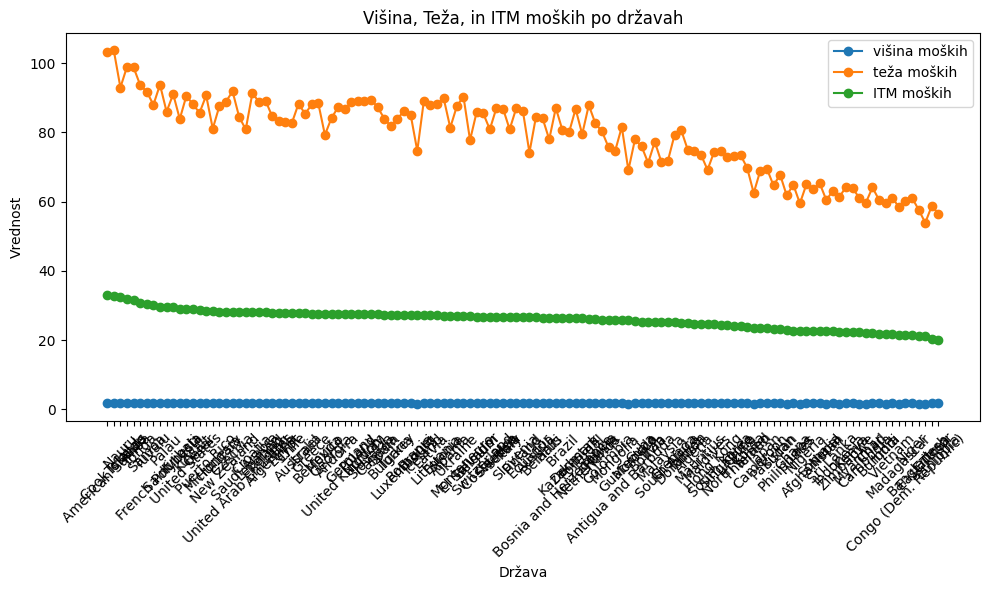

In [161]:
countries_sorted = countries.sort_values(by='ITM moških', ascending=False)

columns = ['višina moških', 'teža moških', 'ITM moških']

#naredimo pikice
plt.figure(figsize=(10, 6))
for column in columns:
    plt.plot(countries_sorted['ime države'], countries_sorted[column], marker='o', label=column)

plt.xlabel('Država')
plt.ylabel('Vrednost')
plt.title('Višina, Teža, in ITM moških po državah')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

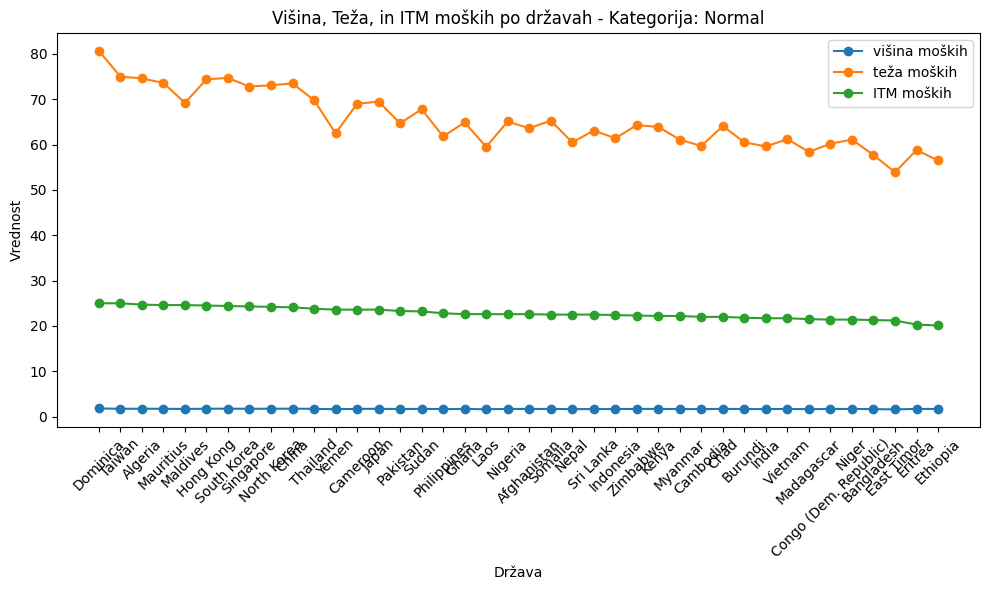

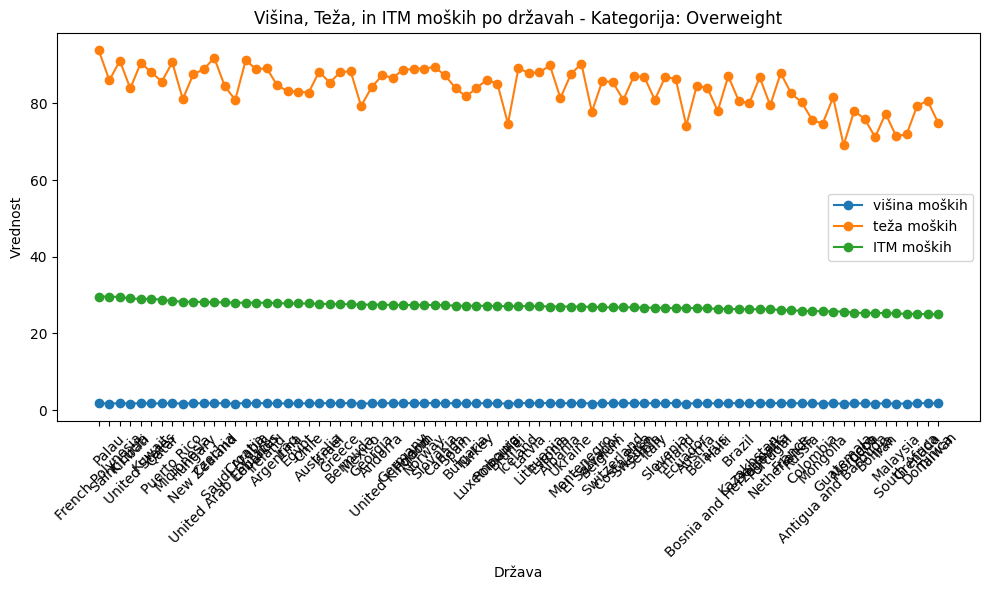

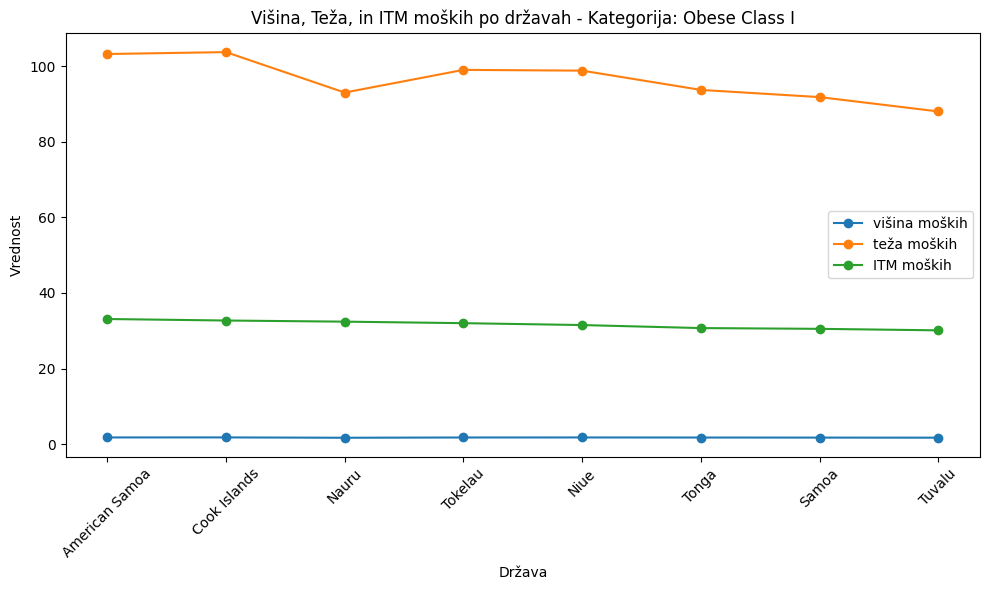

In [162]:
countries_sorted = countries.sort_values(by='ITM moških', ascending=False)

columns = ['višina moških', 'teža moških', 'ITM moških']

for _, row in ITM.iterrows():
    category = row['kategorija']
    itm_range = row['ITM']
    
    if '<' in itm_range:
        min_itm = float('-inf')
        max_itm = float(itm_range[1:])
    elif '>' in itm_range:
        min_itm = float(itm_range[1:])
        max_itm = float('inf')
    else:
        itm_values = itm_range.split(' - ')
        min_itm = float(itm_values[0])
        max_itm = float(itm_values[1])
    

    filtered_countries = countries_sorted[
        countries_sorted['ITM moških'].between(min_itm, max_itm)
    ]
    
    # da je vsaj ena država v kategoriji - da nimamo praznih grafov
    if not filtered_countries.empty:
        
        plt.figure(figsize=(10, 6))
        
        for column in columns:
            plt.plot(filtered_countries['ime države'], filtered_countries[column], marker='o', label=column)
        
        plt.xlabel('Država')
        plt.ylabel('Vrednost')
        plt.title(f'Višina, Teža, in ITM moških po državah - Kategorija: {category}')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

kontinenti

<Figure size 1000x600 with 0 Axes>

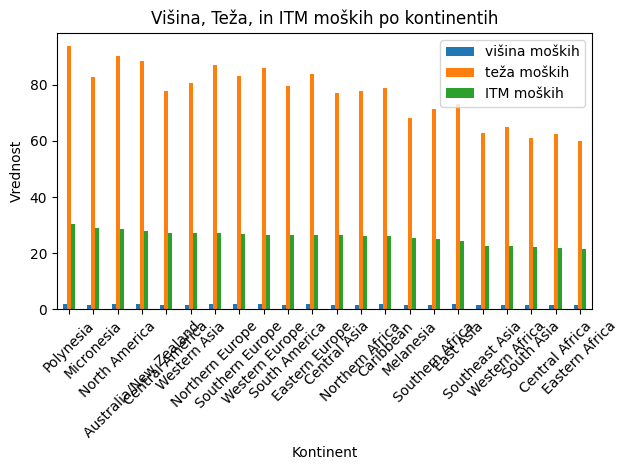

In [163]:
continents_sorted = urejena_tabela_continents.sort_values(by='ITM moških', ascending=False)

columns = ['višina moških', 'teža moških', 'ITM moških']

plt.figure(figsize=(10, 6))
continents_sorted[columns].set_index(continents_sorted['del kontinenta']).plot(kind='bar', rot=45)
plt.xlabel('Kontinent')
plt.ylabel('Vrednost')
plt.title('Višina, Teža, in ITM moških po kontinentih')
plt.tight_layout()
plt.show()


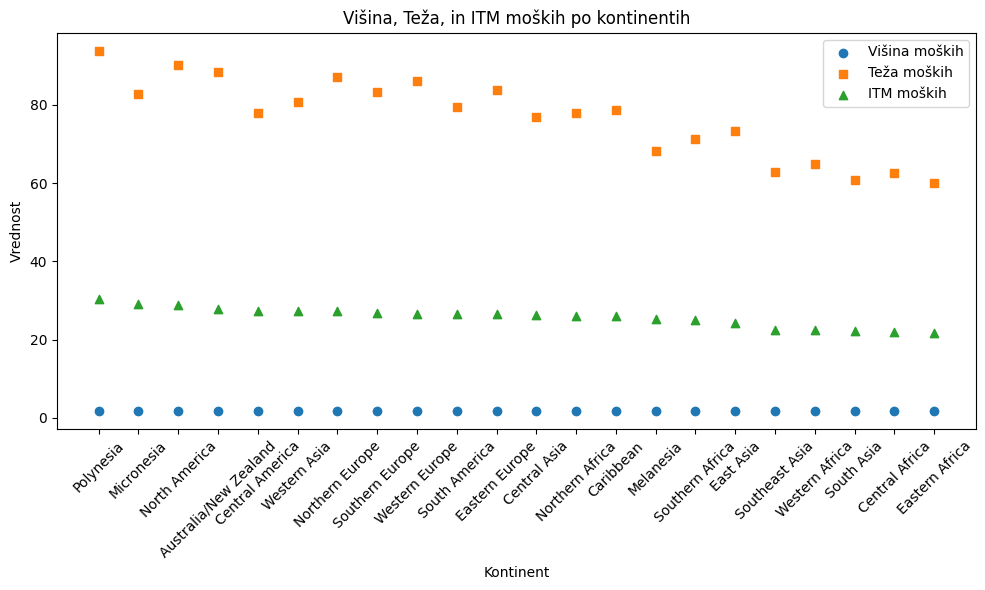

In [164]:
import matplotlib.pyplot as plt

continents_sorted = urejena_tabela_continents.sort_values(by='ITM moških', ascending=False)

columns = ['višina moških', 'teža moških', 'ITM moških']

plt.figure(figsize=(10, 6))
plt.scatter(continents_sorted['del kontinenta'], continents_sorted['višina moških'], label='Višina moških', marker='o')
plt.scatter(continents_sorted['del kontinenta'], continents_sorted['teža moških'], label='Teža moških', marker='s')
plt.scatter(continents_sorted['del kontinenta'], continents_sorted['ITM moških'], label='ITM moških', marker='^')

plt.xlabel('Kontinent')
plt.ylabel('Vrednost')
plt.title('Višina, Teža, in ITM moških po kontinentih')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


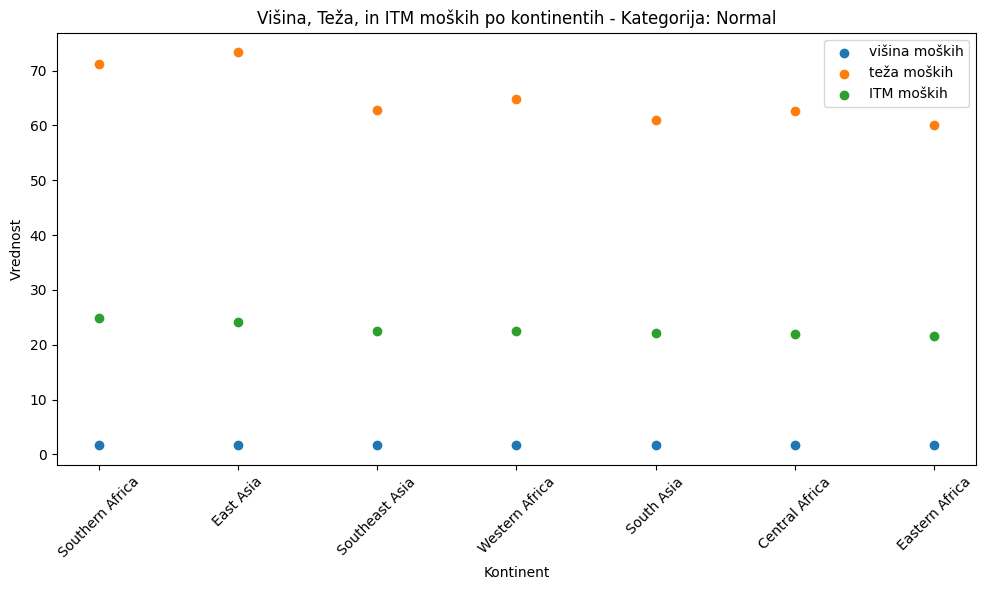

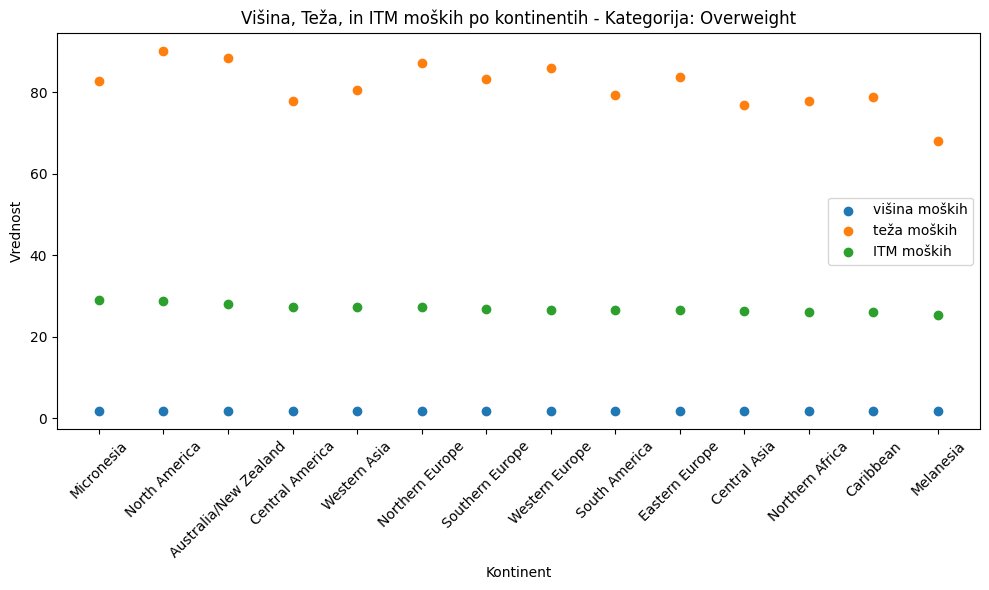

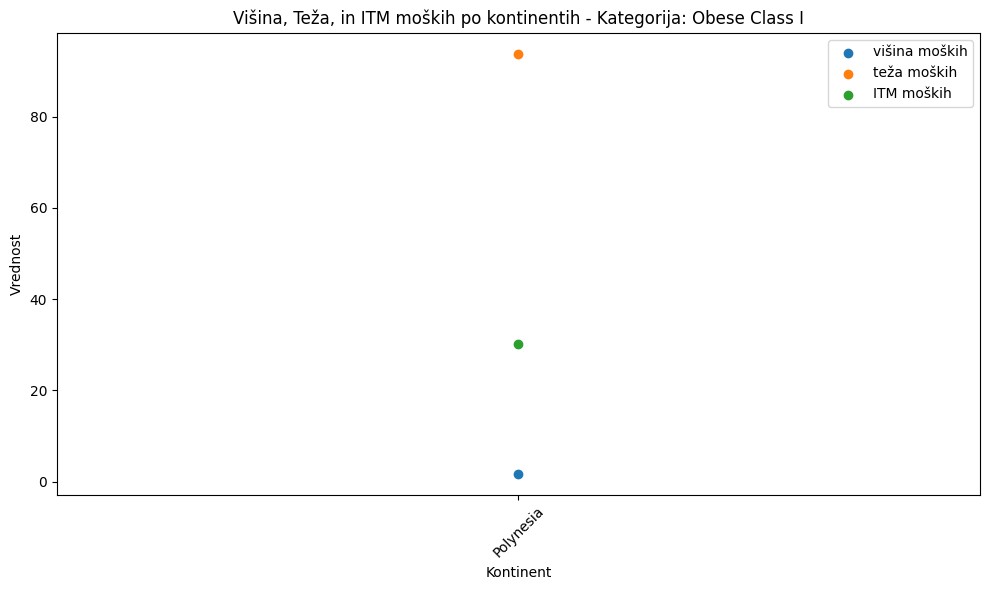

In [165]:
for _, row in ITM.iterrows():
    category = row['kategorija']
    itm_range = row['ITM']
    
    if '<' in itm_range:
        min_itm = float('-inf')
        max_itm = float(itm_range[1:])
    elif '>' in itm_range:
        min_itm = float(itm_range[1:])
        max_itm = float('inf')
    else:
        itm_values = itm_range.split(' - ')
        min_itm = float(itm_values[0])
        max_itm = float(itm_values[1])
    
    filtered_continents = continents_sorted[
        continents_sorted['ITM moških'].between(min_itm, max_itm)
    ]
    
    # da ni praznih grafov
    if not filtered_continents.empty:
        
        plt.figure(figsize=(10, 6))
        
        for column in columns:
            plt.scatter(filtered_continents['del kontinenta'], filtered_continents[column], marker='o', label=column)
        
        plt.xlabel('Kontinent')
        plt.ylabel('Vrednost')
        plt.title(f'Višina, Teža, in ITM moških po kontinentih - Kategorija: {category}')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
